In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('cleaned_data_1.csv')

In [8]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
regressor.coef_

array([-15.84230876,  -0.72209799,  -2.51152075,  -1.38818232,
        -0.84155463,  -9.35371295, -11.32087403,   0.5496871 ])

In [13]:
regressor.intercept_

763.0768032875101

In [14]:
print(f"Coefficient of R^2 on train set: {regressor.score(X_train, y_train)}")

Coefficient of R^2 on train set: 0.40130070313506305


In [15]:
print(f"Coefficient of R^2 on test set: {regressor.score(X_test, y_test)}")

Coefficient of R^2 on test set: 0.32029156453105967


# Using Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [17]:
score.mean()

0.12006321018947126

In [18]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-15.842309
TM,-0.722098
Tm,-2.511521
H,-1.388182
PP,-0.841555
VV,-9.353713
V,-11.320874
VM,0.549687


In [21]:
evaluation = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeff'])

In [23]:
a = list(evaluation['Coeff'])
print(a)

[-15.842308760253653, -0.7220979891467078, -2.5115207466237575, -1.3881823174864873, -0.8415546336175435, -9.353712950313048, -11.320874027321366, 0.5496871039291846]


In [41]:
c = 0
for i in range(len(a)):
    effect = '+++UP+++' if a[i]>0 else '---down---'
    print(f'Fixing features by 1 unit increase in {X.columns[c]}   is going {effect} in AQI PM2.5 by --->{a[i]:.2f} ')
    c = c+1

Fixing features by 1 unit increase in T   is going ---down--- in AQI PM2.5 by --->-15.84 
Fixing features by 1 unit increase in TM   is going ---down--- in AQI PM2.5 by --->-0.72 
Fixing features by 1 unit increase in Tm   is going ---down--- in AQI PM2.5 by --->-2.51 
Fixing features by 1 unit increase in H   is going ---down--- in AQI PM2.5 by --->-1.39 
Fixing features by 1 unit increase in PP   is going ---down--- in AQI PM2.5 by --->-0.84 
Fixing features by 1 unit increase in VV   is going ---down--- in AQI PM2.5 by --->-9.35 
Fixing features by 1 unit increase in V   is going ---down--- in AQI PM2.5 by --->-11.32 
Fixing features by 1 unit increase in VM   is going +++UP+++ in AQI PM2.5 by --->0.55 


In [42]:
pred = regressor.predict(X_test)

In [43]:
pred

array([149.13508928, 209.05205863, 101.82664038,  89.05340212,
        48.71805986,  23.54165762,  75.72021012,  75.48830324,
       107.61265126,  77.58530808, 121.27748314, 149.43830148,
       194.28996136,  99.95024248, 147.04119536, 158.2329355 ,
        40.24076133, 160.04075744,  40.13370416, 100.61832988,
       178.03975451, 117.20748823, 113.58409125, 173.51057903,
        69.67116494,  69.86399024, 119.57445974,  48.3863973 ,
       104.17133036, 150.96458049, 132.50658727,  83.08411453,
        19.48344316,  95.53557801,  53.34496985, 142.21816989,
        99.85138761,  70.77412708,  89.60382526, 107.90952808,
        56.85706855, 191.40156466, 169.88815082, 166.89993981,
       144.85114104,  83.16658528, 139.36673316,  75.44397491,
        70.53073446,  60.90281758, 154.79000003, 169.66352018,
       108.39570505, 153.3859219 , 145.20029253, 115.4242648 ,
       187.28884155, 176.87163765, 158.09707712, 159.77427082,
       141.0504507 ,  91.19415805, 164.56112715, 166.90

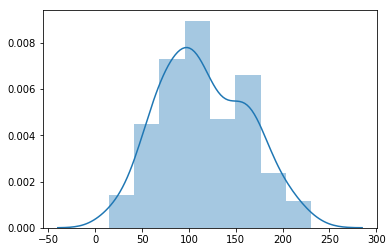

In [44]:
sns.distplot(pred)

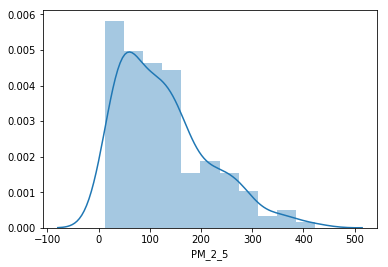

In [45]:
sns.distplot(y_test)

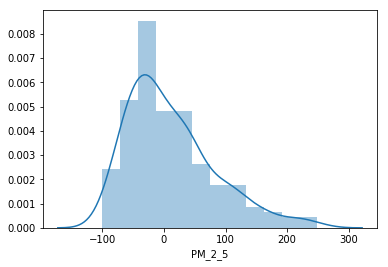

In [46]:
sns.distplot(y_test - pred)

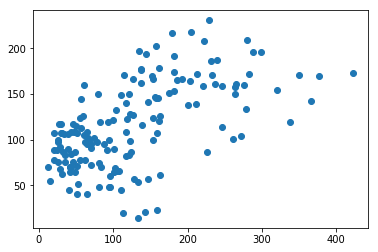

In [47]:
plt.scatter(y_test,pred)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 55.12183806894883
MSE: 5157.1723387446555
RMSE: 71.81345513721405


# Pickle

In [51]:
import pickle
pickle.dump(regressor, open('LinearReg.pkl', 'wb'))

In [1]:
import pickle 
a = open('LinearReg.pkl','rb')
b = pickle.load(a)


In [2]:
print(b)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
